In [9]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline



class Indicators:
    def __init__(self, ticker, start, end):
        self.ticker = ticker
        self.start = start
        self.end = end

    
    
    def getData(self):
        '''get raw data from yahoo finance'''
        data = web.DataReader(self.ticker, 'yahoo', self.start, self.end)
        return data
    
    
    def CCI(self, data, ndays):
        '''calculate CCI'''
        TP = (data['High'] + data['Low'] + data['Close']) / 3
        CCI = (TP - TP.rolling(ndays).mean()) / (0.015 * TP.rolling(ndays).std())
        CCI_series = pd.Series(CCI, name = 'CCI')
        return CCI_series
    
    
    def EMV(self, data, ndays):
        '''calculate EMV'''
        a = ((data['High'] + data['Low']) - (data['High'].shift(1) + data['Low'].shift(1))) / 2
        b = data['Volume'] / (data['High'] - data['Low'])
        EMV = a / b * 100000000
        EMV_MA = pd.Series(EMV.rolling(ndays).mean(), name = 'EMV')
        return EMV_MA
    
    
    def ROC(self, data, ndays):
        '''calculate ROC'''
        a = data['Close']
        b = a.shift(ndays)
        ROC = pd.Series(a / b - 1, name = 'ROC')
        return ROC

    
    def MA(self, data, ndays1, ndays2):
        '''calculate MA'''
        ma1 = data['Close'].rolling(ndays1).mean()
        ma2 = data['Close'].rolling(ndays2).mean()
        series_ma1 = pd.Series(ma1, name='ma({})'.format(ndays1))
        series_ma2 = pd.Series(ma2, name='ma({})'.format(ndays2))
        return series_ma1, series_ma2
    
    
    def BB(self, data, ndays):
        '''Calculate Bollinger Bands'''
        rolling = data['Close'].rolling(ndays)
        ma = rolling.mean()
        sd = rolling.std()
        Upper_bound = pd.Series(ma + 2 * sd, name = 'BB_Upper')
        Lower_bound = pd.Series(ma - 2 * sd, name = 'BB_Lower')
        return Upper_bound, Lower_bound
    
    
    def FI(self, data, ndays):
        '''Calculate Force Index'''
        FI = pd.Series(data['Close'].diff(ndays), name = 'FI')        
        return FI
    
    
    def plott_1(self, data, indicator_series):
        '''plotting for CCI, EMV, ROC, FI only'''
        fig, ax = plt.subplots(2,1,figsize=(8,4),squeeze = False)
        ax[0][0].plot(data['Close'], label = 'Close')
        ax[0][0].legend(loc=1, prop = {'size':8})
        ax[0][0].set_title('Close Price of {}'.format(self.ticker))
        ax[0][0].grid(True)
        
        ax[1][0].plot(indicator_series, 'k', label = indicator_series.name,lw = 0.4)
        ax[1][0].legend(loc = 1, prop = {'size':8})
        ax[1][0].grid(True)
        
    def plott_2(self, data, indicator_series1, indicator_series2):
        '''plotting for BB MA only'''
        plt.figure(figsize = (15,4))
        plt.title('Close Price of {}'.format(self.ticker))
        plt.plot(data['Close'], label = 'Close Price of {}'.format(self.ticker), lw = 1.4)
        plt.plot(indicator_series1, 'k', lw = 0.9)
        plt.plot(indicator_series2, 'k', lw = 0.9)
        plt.legend(loc = 2)
        plt.grid(True)
        
if __name__ == '__main__':
    i = Indicators('AAPL', '1/1/2018', '1/1/2019')

mappingproxy({'__module__': '__main__',
              '__init__': <function __main__.Indicators.__init__(self, ticker, start, end)>,
              'getData': <function __main__.Indicators.getData(self)>,
              'CCI': <function __main__.Indicators.CCI(self, data, ndays)>,
              'EMV': <function __main__.Indicators.EMV(self, data, ndays)>,
              'ROC': <function __main__.Indicators.ROC(self, data, ndays)>,
              'MA': <function __main__.Indicators.MA(self, data, ndays1, ndays2)>,
              'BB': <function __main__.Indicators.BB(self, data, ndays)>,
              'FI': <function __main__.Indicators.FI(self, data, ndays)>,
              'plott_1': <function __main__.Indicators.plott_1(self, data, indicator_series)>,
              'plott_2': <function __main__.Indicators.plott_2(self, data, indicator_series1, indicator_series2)>,
              '__dict__': <attribute '__dict__' of 'Indicators' objects>,
              '__weakref__': <attribute '__weakref__'

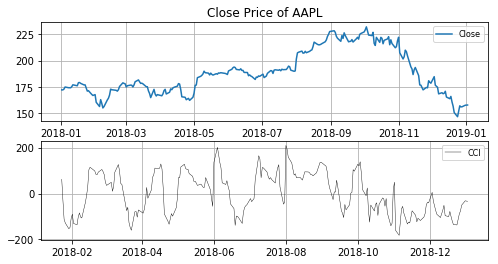

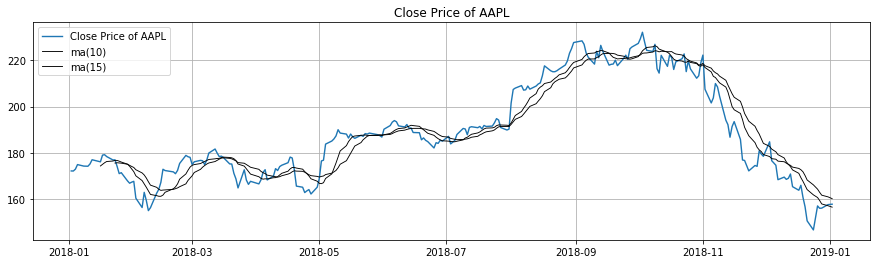

In [11]:
# i = Indicators('AAPL', '1/1/2018', '1/1/2019')
# data = i.getData()
# CCI = i.CCI(data, 15)
# EMV = i.EMV(data, 15)
# ROC = i.ROC(data, 15)
# MA_10, MA_15 = i.MA(data, 10, 15)
# BB1, BB2 = i.BB(data, 15)
# FI = i.FI(data, 4)
# i.plott_1(data, CCI)
# i.plott_2(data, MA_10, MA_15)
# Indicators.__dict__